In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
import plot_utils as plt

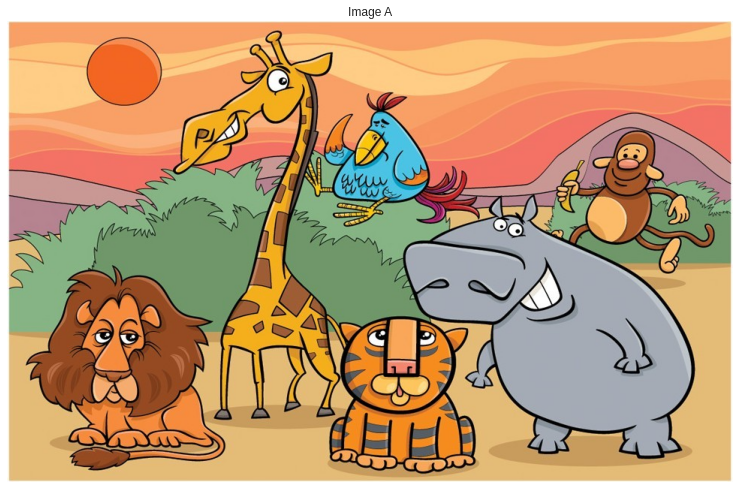

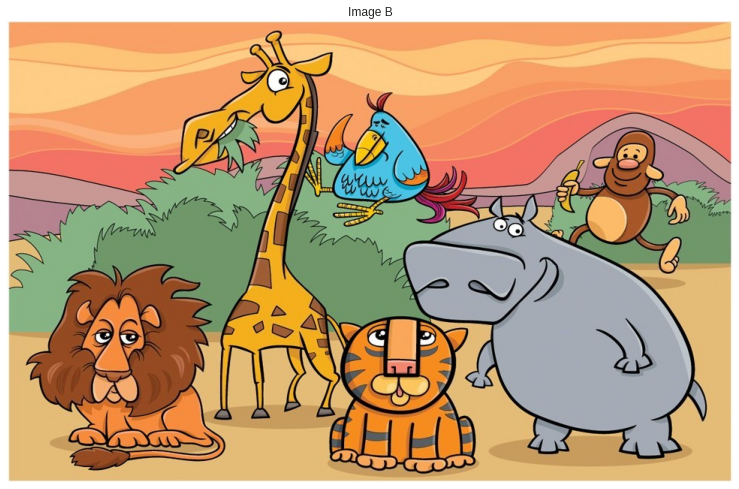

In [2]:
# Load the images
imgA = cv2.imread('./data/10.png')
imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)
imgB = cv2.imread('./data/11.png')
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)
plt.plotImage(imgA,"Image A")
plt.plotImage(imgB,"Image B")

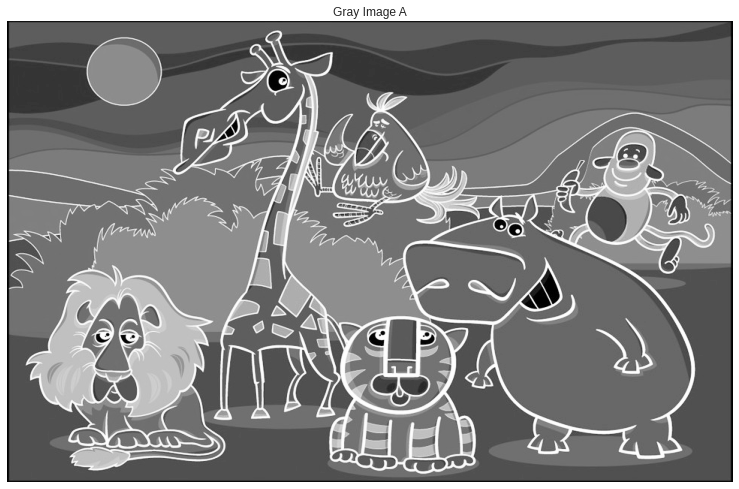

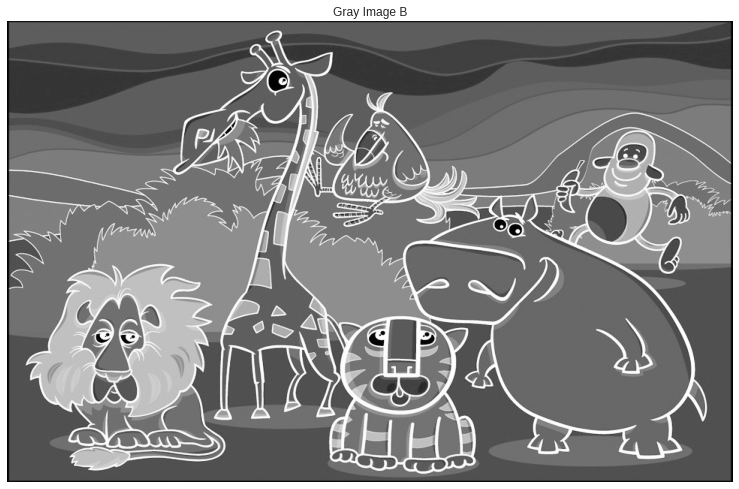

In [81]:
# Convert to grayscale images
grayA = cv2.cvtColor(imgA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_RGB2GRAY)
plt.plotImage(grayA,"Gray Image A")
plt.plotImage(grayB,"Gray Image B")

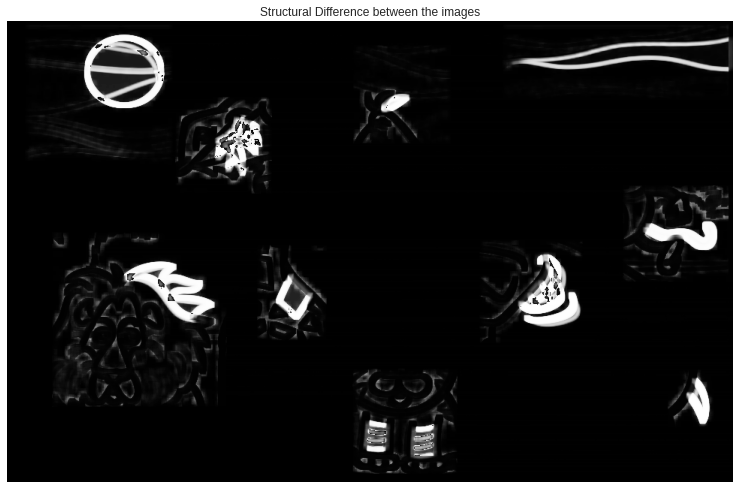

In [82]:
# Calculating SSIM (Structural Similarity)
diff = structural_similarity(grayA, grayB, full=True)[1]
diff = (diff * 255).astype("uint8")
plt.plotImage(diff,"Structural Difference between the images")

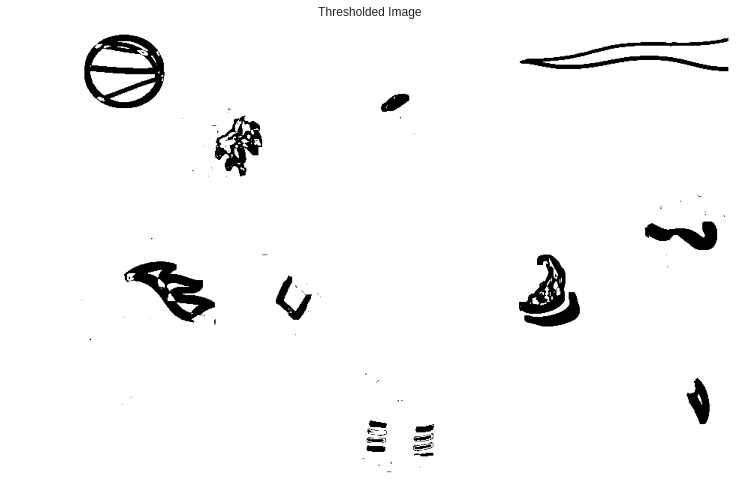

In [83]:
# Thresholding the Difference Image
thresh = cv2.threshold(diff, 150, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.plotImage(thresh,"Thresholded Image")

In [84]:
# Find contours in the image
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

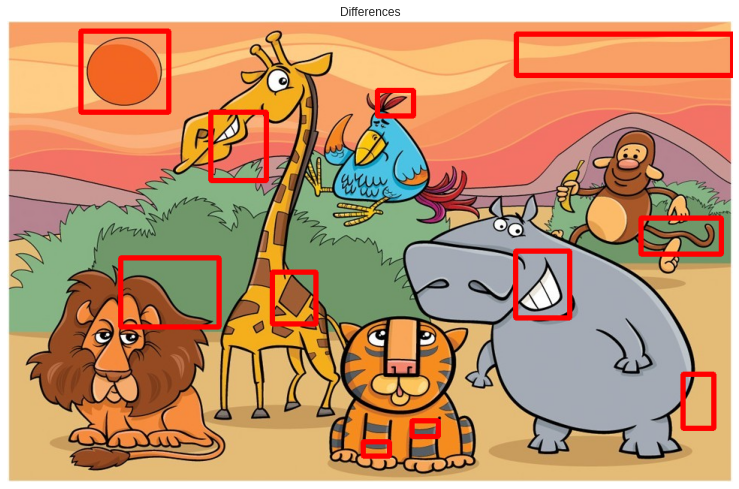

In [85]:
rect = []
for c in cnts:
    if cv2.contourArea(c) > 150:
        rect.append(cv2.boundingRect(c))
for r in rect:
    cv2.rectangle(imgA, (r[0]-5,r[1]-5), (r[0]+r[2]+5,r[1]+r[3]+5), (255, 0, 0), 6)
plt.plotImage(imgA,"Differences")